--- Week 1: Problem Definition ---
Problem Statement: To predict the 'Average Cost of an EV' (avg_cost_ev) based on economic and policy factors.
Task: This is a regression problem.
Target Variable (y): 'avg_cost_ev'

Features (X):
- ev_percentage_share
- charging_stations_count
- avg_cost_gasoline_vehicle
- gov_incentive_amount
- co2_emissions_per_vehicle
- fuel_price_per_liter
- electricity_price_per_kWh
- country (will need to be one-hot encoded later)
- year

--- Step 2: Dataset Collection & Loading ---
Please upload your dataset file (e.g., ev_adoption_dataset_Raw.csv).
A file chooser will appear below this cell. Select your CSV file.


Saving ev_adoption_dataset_Raw.csv to ev_adoption_dataset_Raw (1).csv
✅ File 'ev_adoption_dataset_Raw (1).csv' uploaded successfully!
Attempting to load file: ev_adoption_dataset_Raw (1).csv
✅ Dataset 'ev_adoption_dataset_Raw (1).csv' loaded successfully!

--- First 5 Rows of Data: ---
         country  year  total_vehicles_registered  ev_vehicles_registered  \
0  United States  2015                   19942603                   46048   
1  United States  2016                   20341455                   48523   
2  United States  2017                   20748284                   53879   
3  United States  2018                   21163249                   63042   
4  United States  2019                   21586514                   77728   

   ev_percentage_share  charging_stations_count  avg_cost_ev  \
0                 0.23                     8524     36696.32   
1                 0.24                     9376     36559.14   
2                 0.26                    10314     42585.

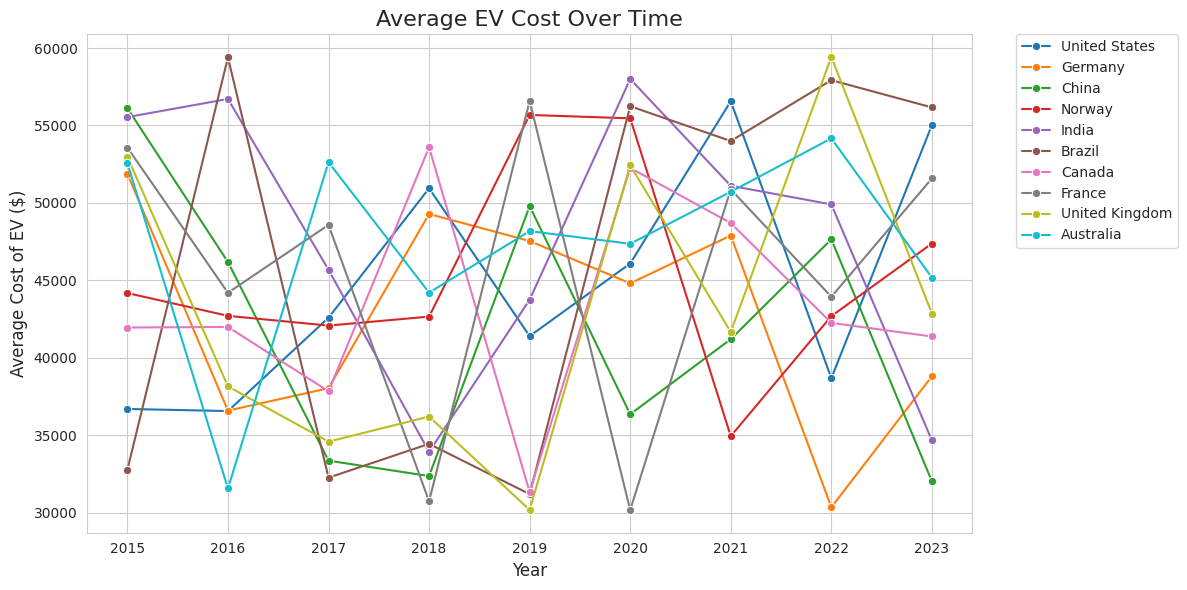

... Plot 1 (EV Cost Over Time) generated.


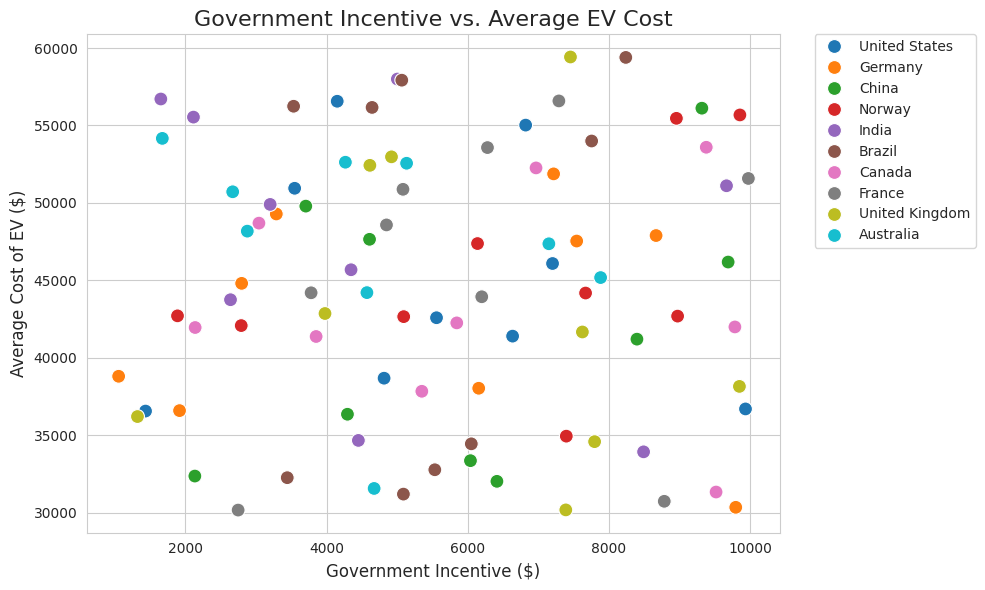

... Plot 2 (Incentive vs. Cost) generated.


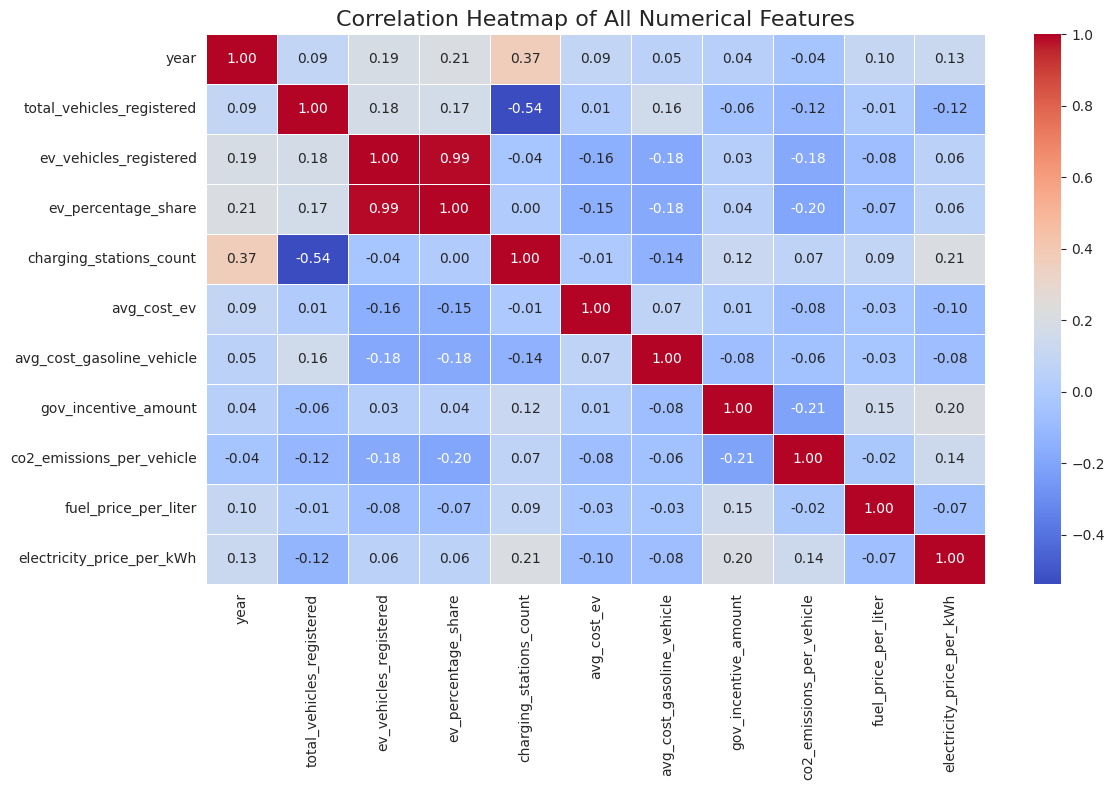

... Plot 3 (Correlation Heatmap) generated.


--- Step 5: Data Cleaning & Saving ---
Checking for missing values in the raw data...
country                      0
year                         0
total_vehicles_registered    0
ev_vehicles_registered       0
ev_percentage_share          0
charging_stations_count      0
avg_cost_ev                  0
avg_cost_gasoline_vehicle    0
gov_incentive_amount         0
co2_emissions_per_vehicle    0
fuel_price_per_liter         0
electricity_price_per_kWh    0
dtype: int64

No missing values found. Data is already clean!

✅ Clean dataset 'ev_adoption_dataset_clean.csv' saved successfully!
You can now use this file for your Week 2 model training.

✅ Week-1 task (including cleaning) completed successfully!


In [9]:
# ---------------------------------------------------------------
# 🧠 Week 1: Problem Definition, Dataset Collection & Exploration
# ---------------------------------------------------------------
#
# Project: Electric Vehicle (EV) Price Prediction
#
# ---------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files # Import files for Colab upload
# Removed tkinter import as it does not work in Colab environments
# import tkinter as tk
# from tkinter import filedialog

# ---------------------------------------------------------------
# 📘 Step 1: Problem Definition
# ---------------------------------------------------------------

print("--- Week 1: Problem Definition ---")
print("Problem Statement: To predict the 'Average Cost of an EV' (avg_cost_ev) based on economic and policy factors.")
print("Task: This is a regression problem.")
print("Target Variable (y): 'avg_cost_ev'")
print("\nFeatures (X):")
print("- ev_percentage_share")
print("- charging_stations_count")
print("- avg_cost_gasoline_vehicle")
print("- gov_incentive_amount")
print("- co2_emissions_per_vehicle")
print("- fuel_price_per_liter")
print("- electricity_price_per_kWh")
print("- country (will need to be one-hot encoded later)")
print("- year\n")


# ---------------------------------------------------------------
# 📘 Step 2: Dataset Collection & Loading
# ---------------------------------------------------------------
print("--- Step 2: Dataset Collection & Loading ---")

# Use google.colab.files.upload() for user to upload dataset
print("Please upload your dataset file (e.g., ev_adoption_dataset_Raw.csv).")
print("A file chooser will appear below this cell. Select your CSV file.")

uploaded = files.upload()

if not uploaded:
    print("❌ ERROR: No file was uploaded. Exiting script.")
    DATASET_FILE = None
    df = pd.DataFrame() # Create empty dataframe to avoid further errors
else:
    # Get the name of the first (and likely only) uploaded file
    DATASET_FILE = list(uploaded.keys())[0]
    print(f"✅ File '{DATASET_FILE}' uploaded successfully!")

# Check if DATASET_FILE is defined (it will be now)
if not DATASET_FILE:
    print("❌ ERROR: No dataset file path specified. Please ensure DATASET_FILE variable is set.")
    df = pd.DataFrame() # Create empty dataframe to avoid further errors
else:
    print(f"Attempting to load file: {DATASET_FILE}")
    try:
        df = pd.read_csv(DATASET_FILE)
        print(f"✅ Dataset '{DATASET_FILE}' loaded successfully!\n")
        print("--- First 5 Rows of Data: ---")
        print(df.head())
    except FileNotFoundError:
        print(f"❌ ERROR: The file '{DATASET_FILE}' was not found.")
        print("Please upload the dataset file to your Colab environment or provide the correct path.")
        df = pd.DataFrame() # Create empty dataframe to avoid further errors
    except Exception as e:
        print(f"❌ ERROR: Could not read the file. Error: {e}")
        df = pd.DataFrame()


# ---------------------------------------------------------------
# 📘 Step 3: Exploratory Data Analysis (EDA)
# ---------------------------------------------------------------

# The rest of the script will only run if the dataframe was loaded successfully
if not df.empty:
    print("\n\n--- Step 3: Exploratory Data Analysis (EDA) ---")

    print("\n[A] Dataset Info (Checking for nulls and data types):")
    df.info()

    print("\n[B] Numerical Statistics:")
    # Get descriptive statistics for the numerical columns
    print(df.describe())

    print("\n[C] Correlation Analysis:")
    # Calculate correlation between numerical features and the 'avg_cost_ev'

    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()

    print("\nCorrelation with Target Variable ('avg_cost_ev'):")
    print(correlation_matrix['avg_cost_ev'].sort_values(ascending=False))


    # ---------------------------------------------------------------
    # 📘 Step 4: Visualization (A Key part of EDA)
# ---------------------------------------------------------------
    print("\n\n--- Step 4: Visualization ---")
    print("Generating plots to understand data relationships...")
    print("(Note: Plots will open in a new window. Close the plot window to continue the script.)")

    # Set up the plot style
    sns.set_style("whitegrid")

    # Plot 1: Average EV Cost Over Time, by Country
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='year', y='avg_cost_ev', hue='country', marker='o')
    plt.title('Average EV Cost Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Cost of EV ($)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()
    print("... Plot 1 (EV Cost Over Time) generated.")

    # Plot 2: Government Incentive vs. EV Cost
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='gov_incentive_amount', y='avg_cost_ev', hue='country', s=100)
    plt.title('Government Incentive vs. Average EV Cost', fontsize=16)
    plt.xlabel('Government Incentive ($)', fontsize=12)
    plt.ylabel('Average Cost of EV ($)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()
    print("... Plot 2 (Incentive vs. Cost) generated.")

    # Plot 3: Correlation Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of All Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.show()
    print("... Plot 3 (Correlation Heatmap) generated.")


    # ---------------------------------------------------------------
    # 📘 Step 5: Data Cleaning & Saving
    # ---------------------------------------------------------------
    print("\n\n--- Step 5: Data Cleaning & Saving ---")

    print("Checking for missing values in the raw data...")
    print(df.isnull().sum())

    # Drop rows with any missing values
    df_cleaned = df.dropna()

    rows_dropped = len(df) - len(df_cleaned)
    if rows_dropped > 0:
        print(f"\nDropped {rows_dropped} rows that contained missing values.")
    else:
        print("\nNo missing values found. Data is already clean!")

    # Save the cleaned data to a new CSV file
    try:
        df_cleaned.to_csv("ev_adoption_dataset_clean.csv", index=False)
        print("\n✅ Clean dataset 'ev_adoption_dataset_clean.csv' saved successfully!")
        print("You can now use this file for your Week 2 model training.")
    except Exception as e:
        print(f"❌ ERROR: Could not save the clean CSV file. Error: {e}")


    print("\n✅ Week-1 task (including cleaning) completed successfully!")
else:
    print("\nScript finished because no data was loaded.")